# Earthquake Damage Prediction

# 1. Introduction

This report provides an overview of the dataset used for analyzing building damage severity. The dataset consists of two CSV files, both containing 260,601 entries, with building_id as the common column. The dataset is complete, with no missing values and a total of 40 features, including 8 categorical variables. The target variable, damage_grade, represents the severity of building damage and has three distinct classes: 1, 2, and 3.

#### Objective

The main goal of this analysis is to explore and prepare the dataset for predictive modeling. This involves:

* Understanding the structure and composition of the dataset

* Exploring the distribution of categorical and numerical features


* Identifying key patterns and relationships


* Preparing the data for model training



#### Dataset Summary
* Total Entries: 260,601

* Total Features: 40


* Common Column: `building_id`


* Categorical Features: 8


* Numerical Features: 31


* Target Variable: `damage_grade` (3 classes: 1, 2, 3)


* Missing Values: None


This analysis serves as a foundation for further data preprocessing, feature selection, and model development. Let me know if you’d like deeper insights, such as correlation analysis or visualizations!

# 2. Domain Analysis

## 2.1 Introduction:

Earthquakes are one of the most destructive natural disasters, causing widespread damage to buildings, infrastructure, and communities. Their impact on human life and property can be devastating, especially in densely populated regions. Buildings that are poorly constructed or lack proper structural integrity are particularly vulnerable during seismic events, often leading to loss of life, displacement, and long-term economic challenges. Understanding the factors that contribute to building vulnerability—such as construction materials, design, location, and age—is essential for improving disaster preparedness and reducing the adverse effects of earthquakes. This dataset provides detailed information about buildings affected by the Gorkha earthquake, helping to identify key factors that influence their susceptibility to damage and guide future building practices and mitigation strategies.

## 2.2 Key Features and Their Significance:

##### 2.2.1 Building Structural Features:

* Land Surface Condition (`land_surface_condition`): Represents the type of surface the building is built on, which can impact stability during an earthquake.

* Foundation Type (`foundation_type`): Different foundation types affect the building's resistance to seismic forces.

* Roof Type (`roof_type`): Roof structure and material can influence how well the building resists seismic shaking.

* Ground Floor Type (`ground_floor_type`): Affects the building’s stability, as weaker ground floors can lead to structural failure.

* Other Floor Types (`other_floor_type`): Materials used for floors above the ground floor influence overall building stability.

* Position (`position`): Describes the building’s location relative to its surroundings, affecting its earthquake vulnerability.

* Plan Configuration (`plan_configuration`): The building’s layout can impact how seismic waves affect it.


##### 2.2.2 Building Material Features


The dataset includes multiple binary features for superstructure materials (e.g., Adobe/Mud, Stone, Timber, Bamboo, Reinforced Concrete), which directly impact a building's seismic resistance. Engineered materials like reinforced concrete are generally more resilient than non-engineered options.


##### 2.2.3 Building Usage Features

* Secondary Usage (`has_secondary_use`): Indicates if the building has other uses, which could affect its design and earthquake resilience.

* Specific Secondary Uses: Includes features for buildings used as hospitals, schools, or offices, which might have stricter building codes.

* Building Age (`age`): Older buildings may have weaker structures and higher earthquake vulnerability.

* Area and Height Percentages (`area_percentage`, `height_percentage`): Larger or taller buildings may incur more damage due to their mass.



# 3. Importing Dependencies

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# 4. Loading Dataset

In [153]:
data=pd.read_csv("train_labels.csv") #loading dataset 1
data

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [154]:
data1=pd.read_csv("train_values.csv") #loading dataset 2
data1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


###### The datasets have one common in column in common on which we will merge both datasets

In [155]:
eq=data.merge(data1,on="building_id",how="inner")
eq

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0


# 5. Preview of Dataset

In [156]:
eq.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


In [157]:
eq.tail()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0
260600,747594,3,21,9,9101,3,10,7,6,n,...,0,0,0,0,0,0,0,0,0,0


# 6. Data Structure

In [158]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [159]:
eq.describe()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.238272,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,0.611814,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,3.000000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,3.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 7. Checking For Missing Values

In [160]:
eq["damage_grade"].value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

In [161]:
print(eq.isna().sum().sum()) # The dataset doesn't contain any null values

0


# 8. EDA

#### 8.1 Class Imbalance in `damage_id` feature

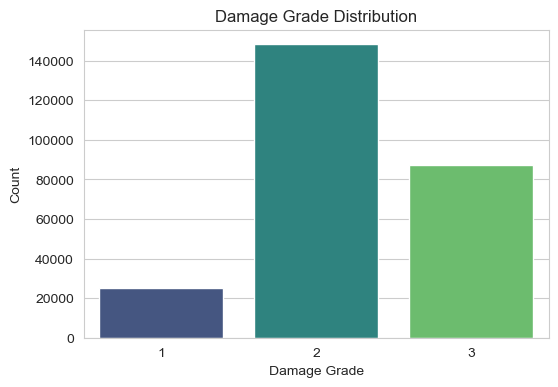

In [162]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="damage_grade",data=eq, palette="viridis")
plt.title("Damage Grade Distribution")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()    



#### 8.2 Co-relation between features

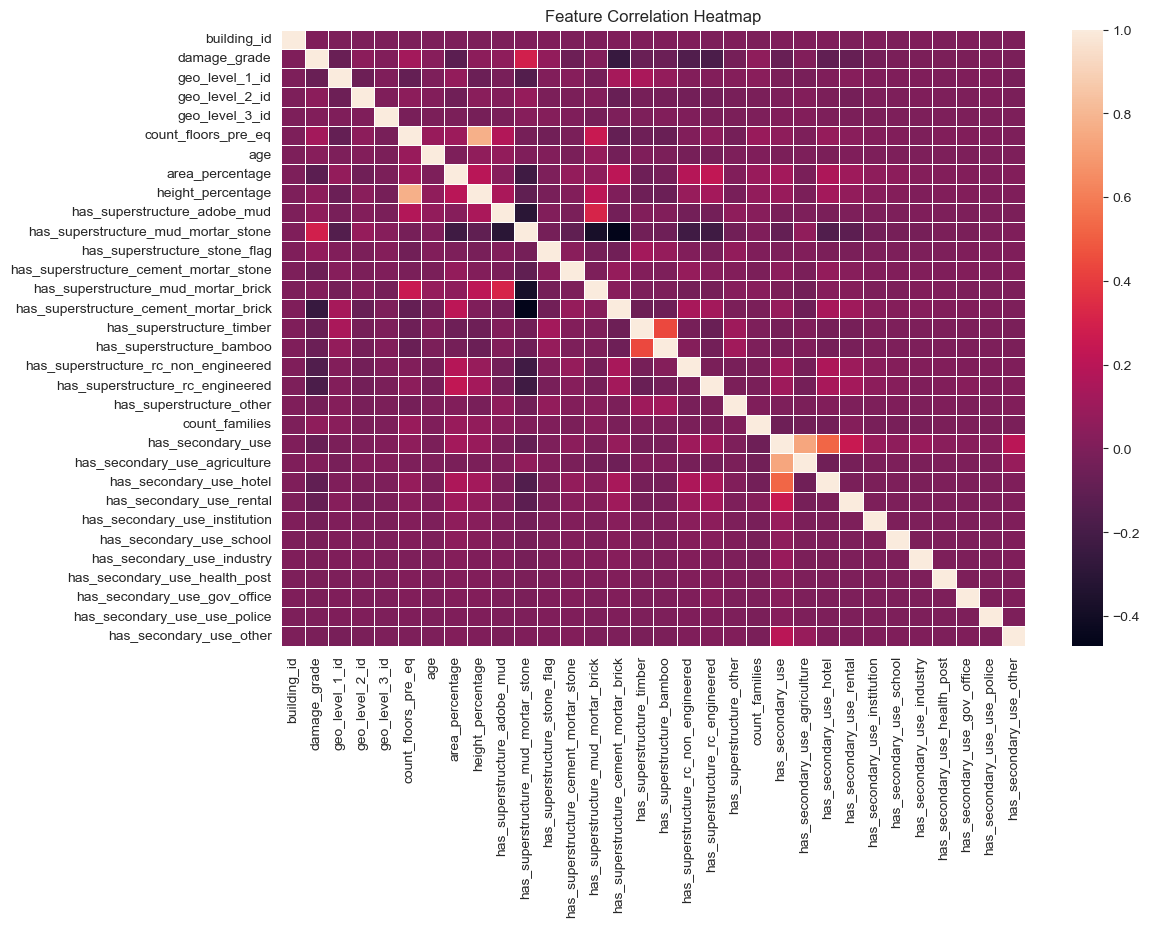

In [163]:
plt.figure(figsize=(12, 8))
sns.heatmap(eq.select_dtypes(include=["number"]).corr(), annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 8.3 Outlier Detection

In [164]:
num_features=eq.select_dtypes(include="number").columns

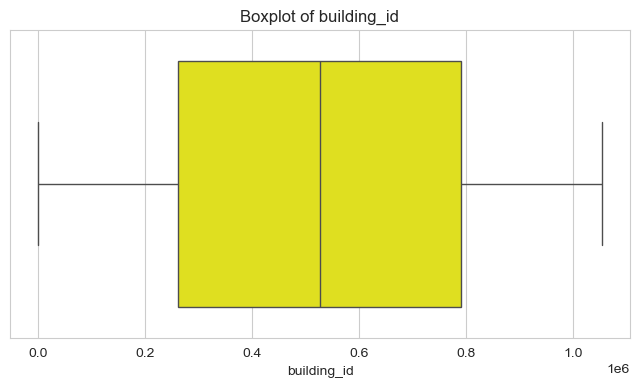

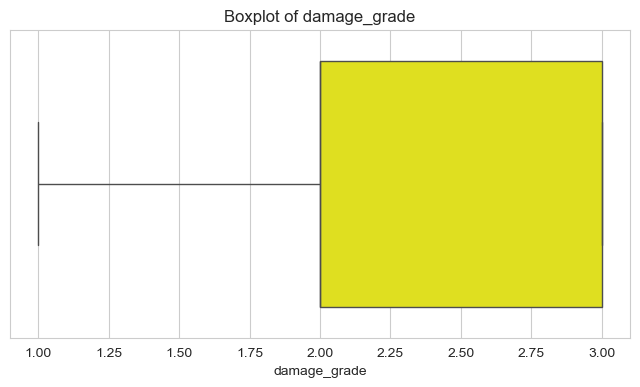

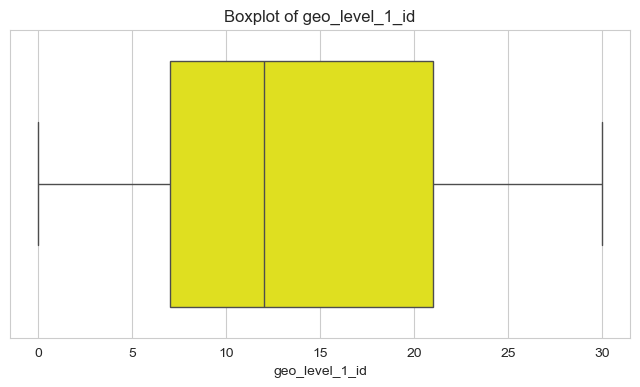

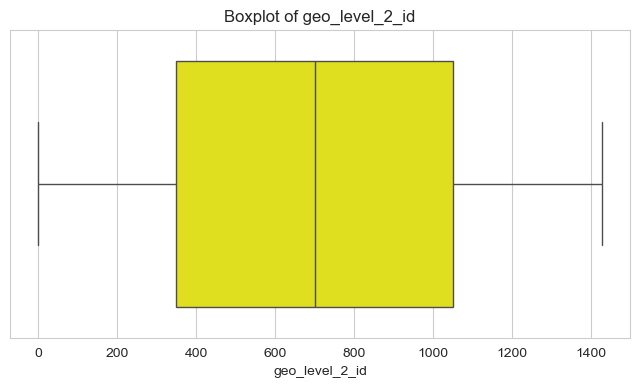

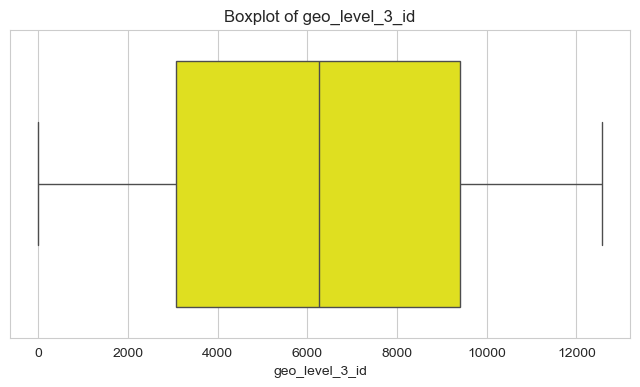

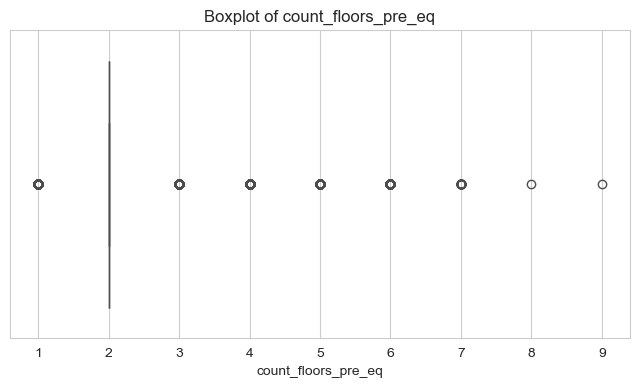

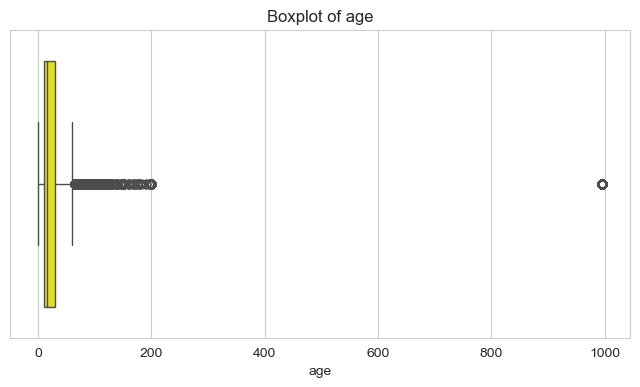

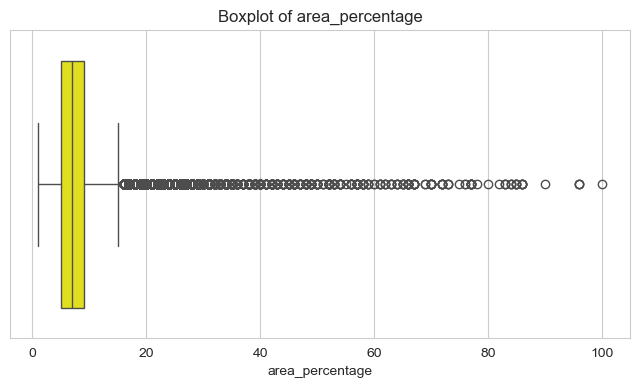

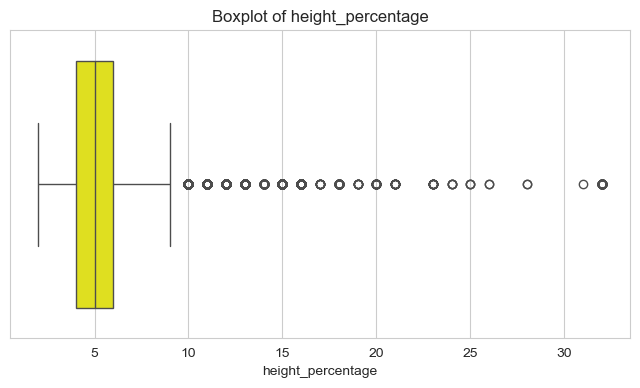

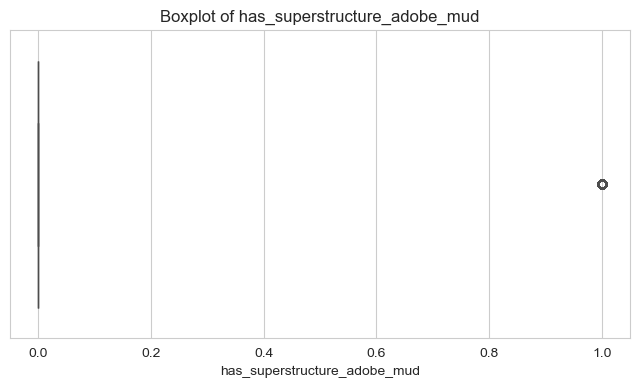

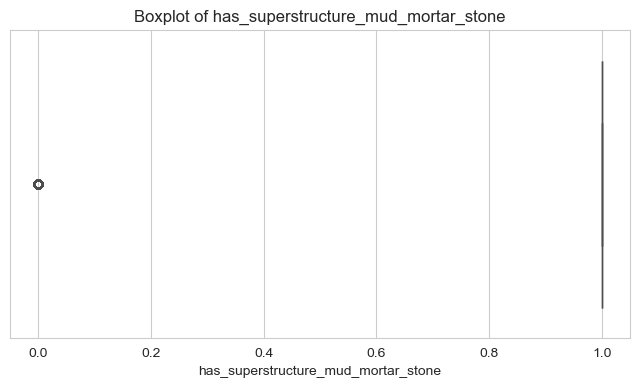

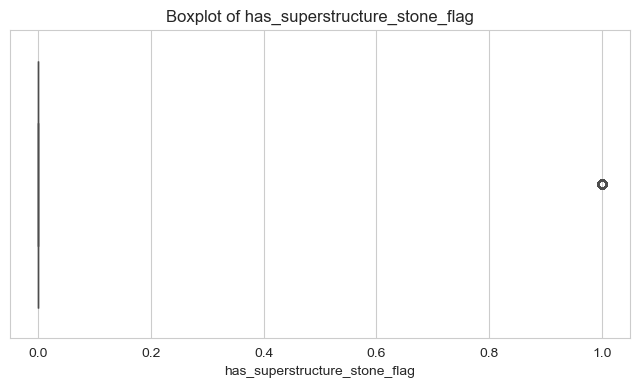

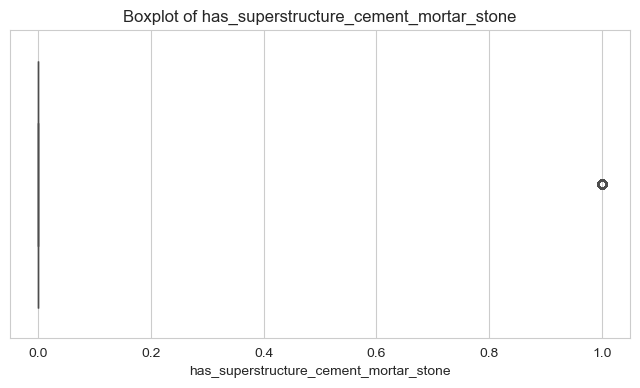

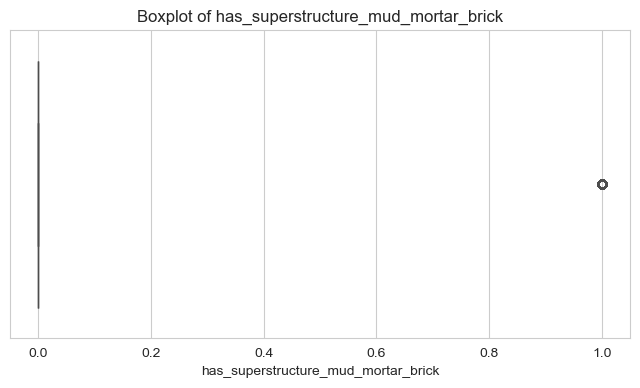

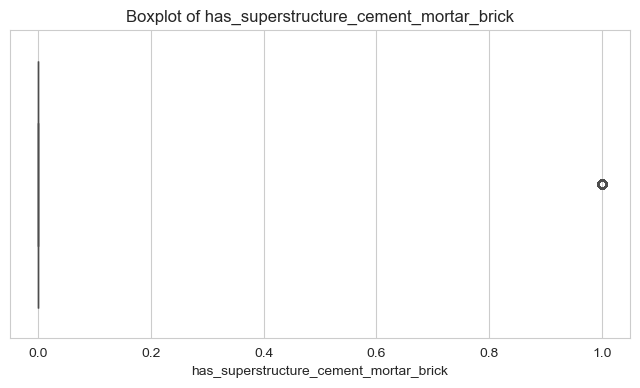

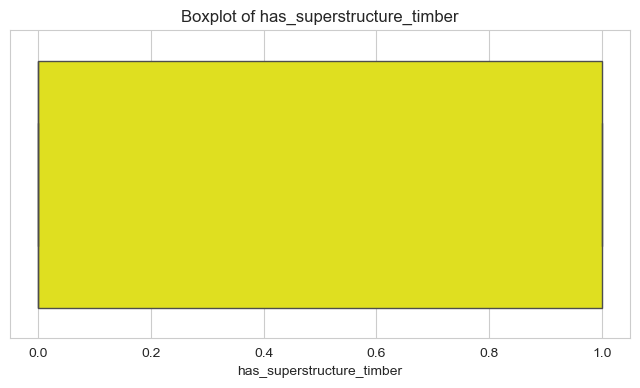

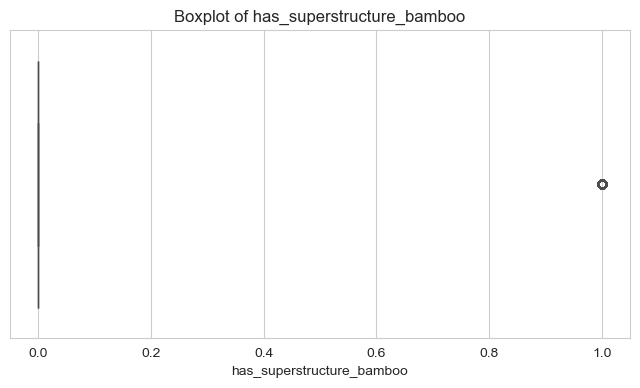

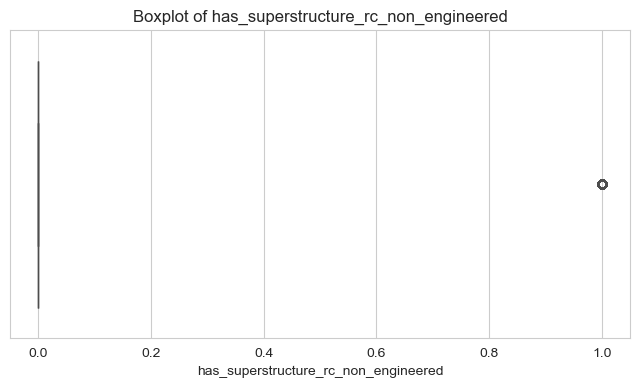

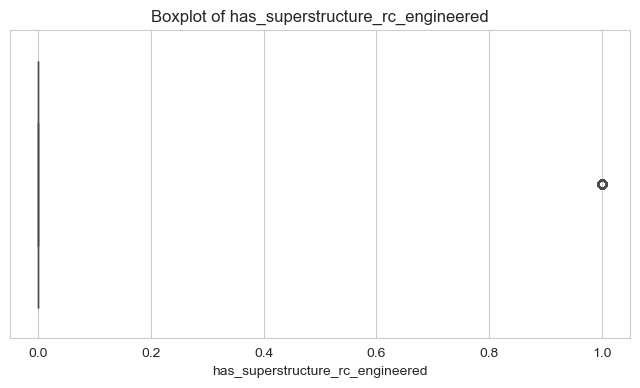

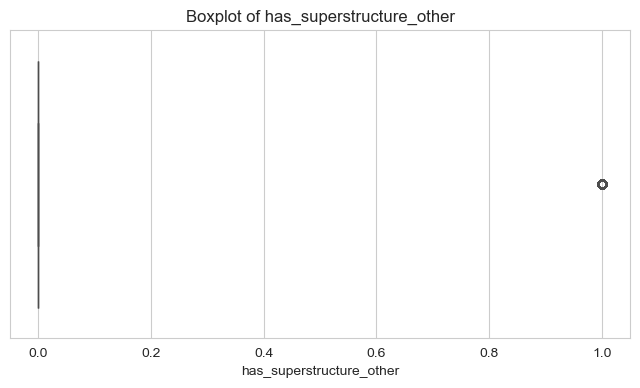

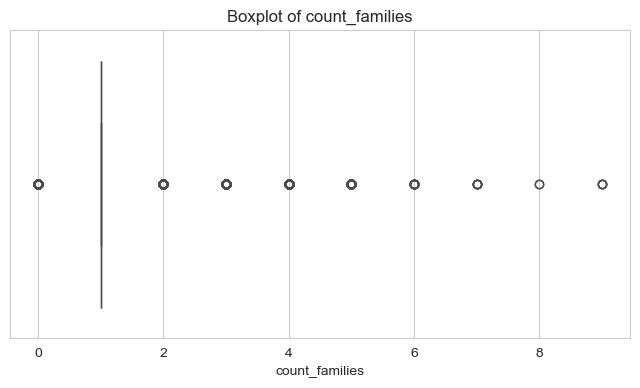

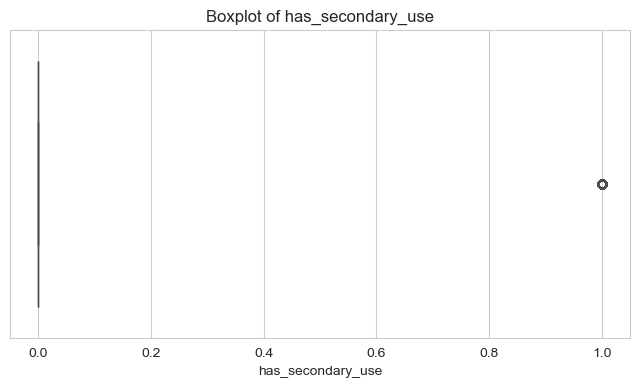

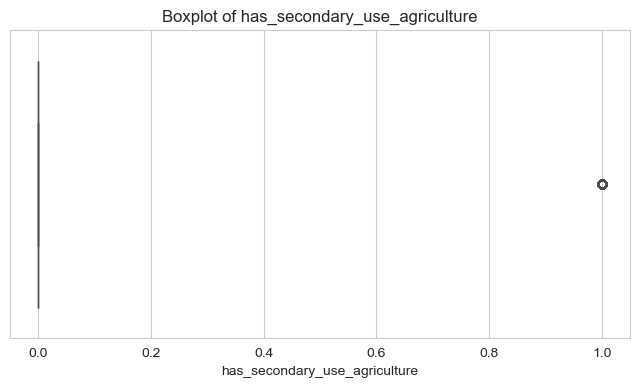

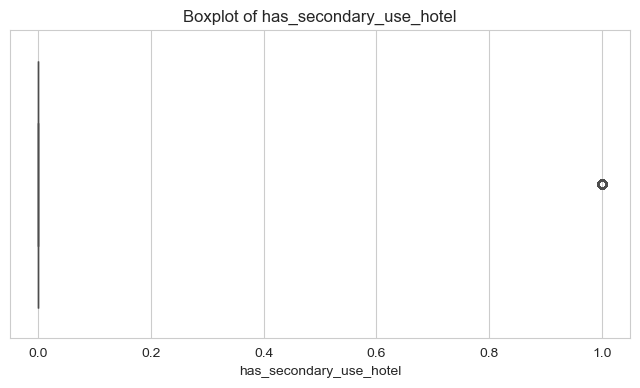

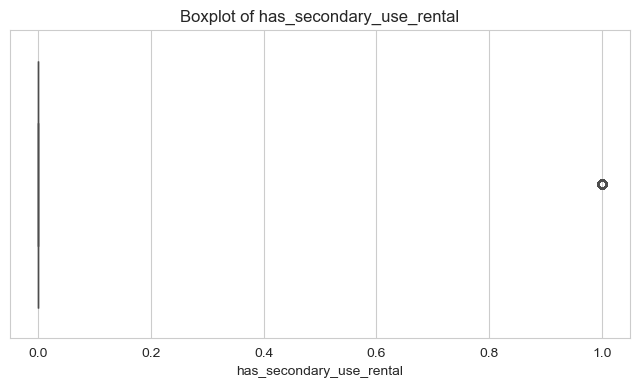

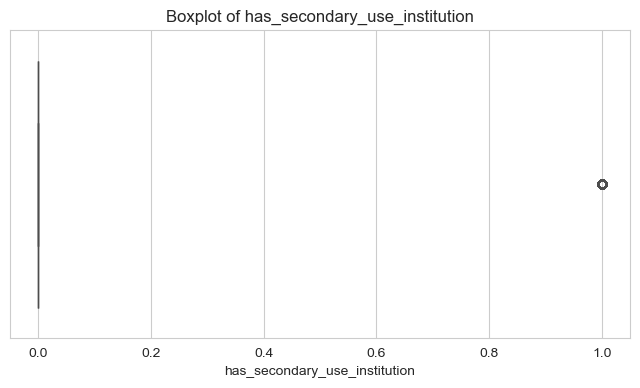

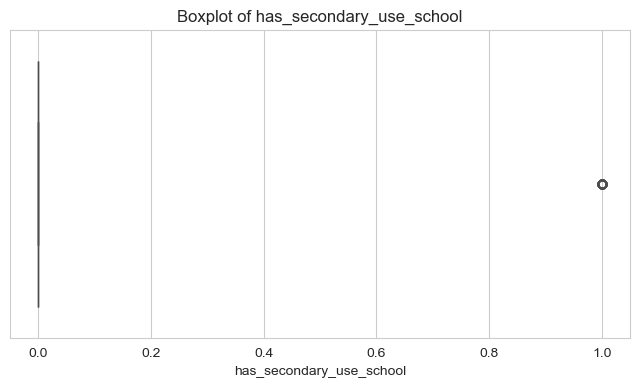

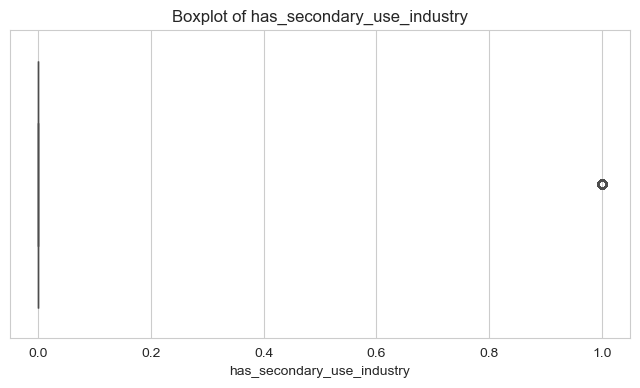

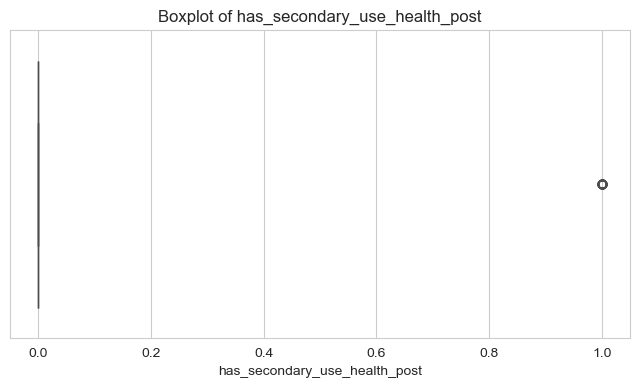

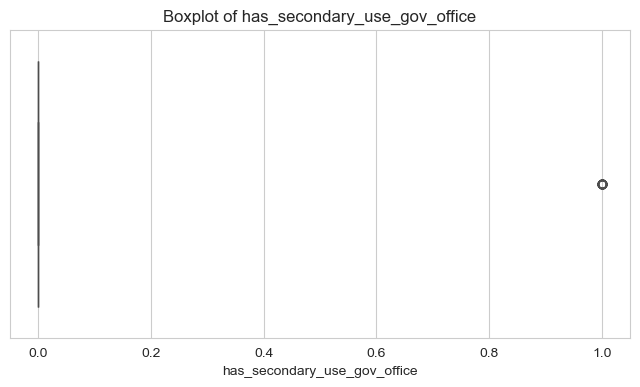

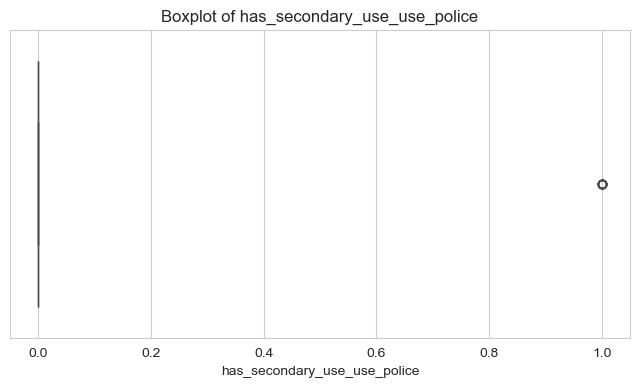

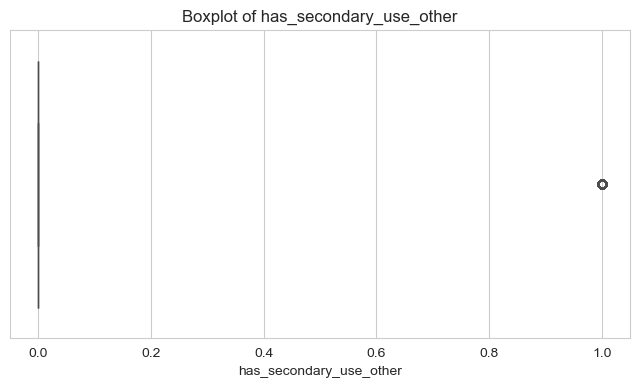

In [165]:
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=eq[col],color="yellow")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

<Axes: xlabel='damage_grade'>

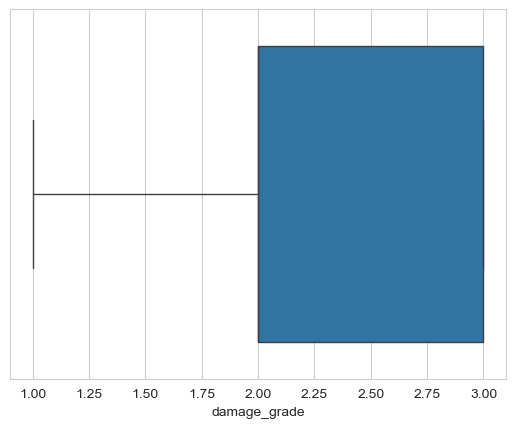

In [166]:
sns.boxplot(x=eq["damage_grade"])

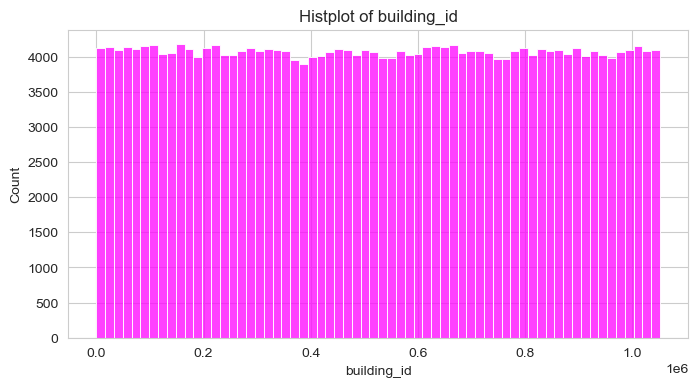

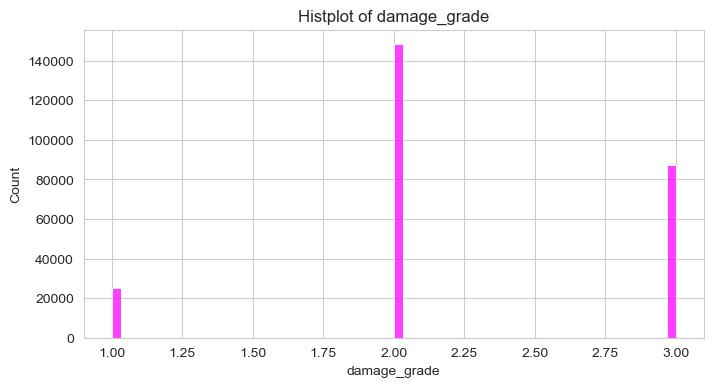

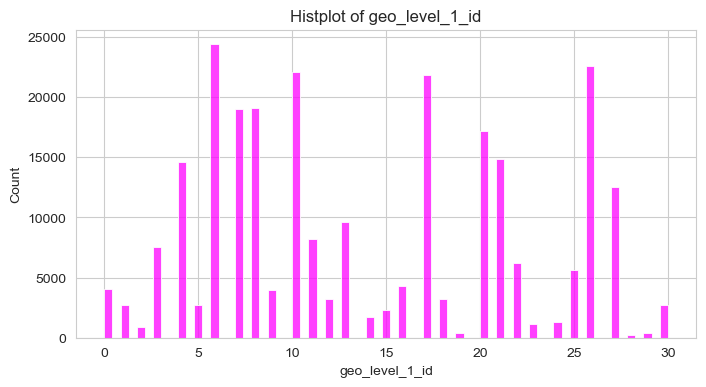

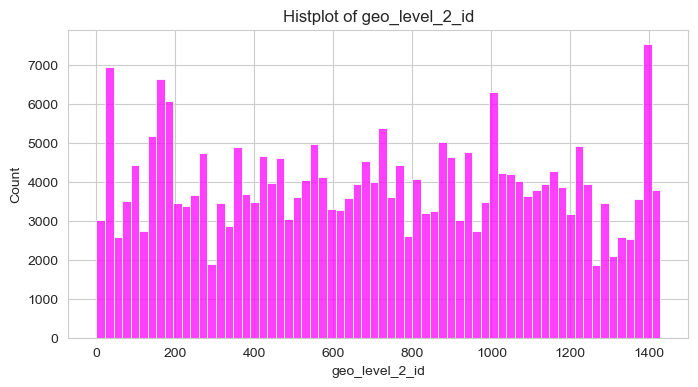

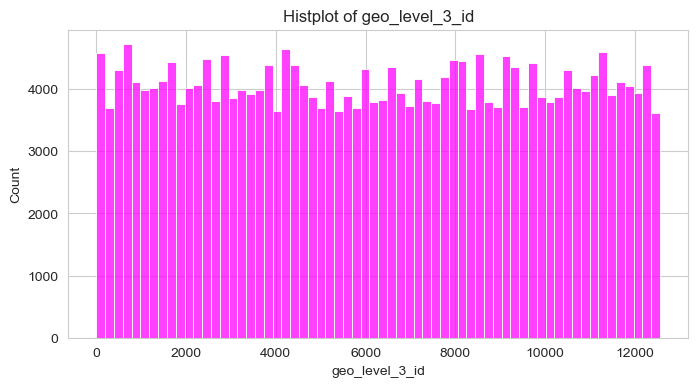

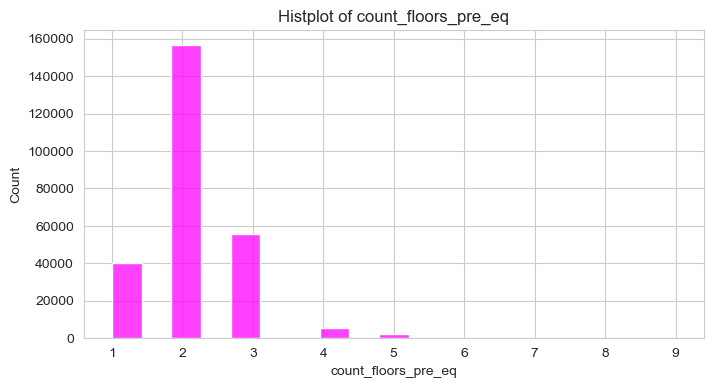

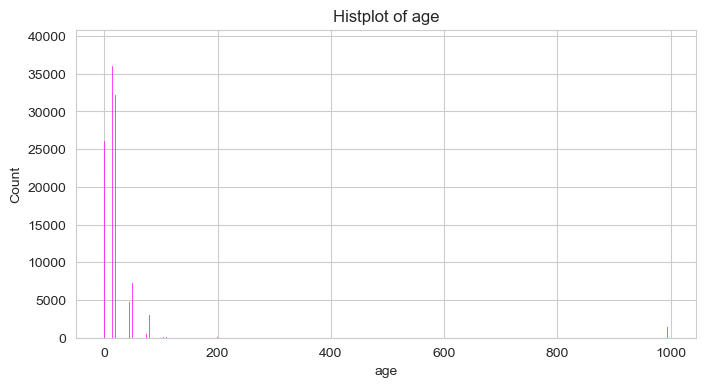

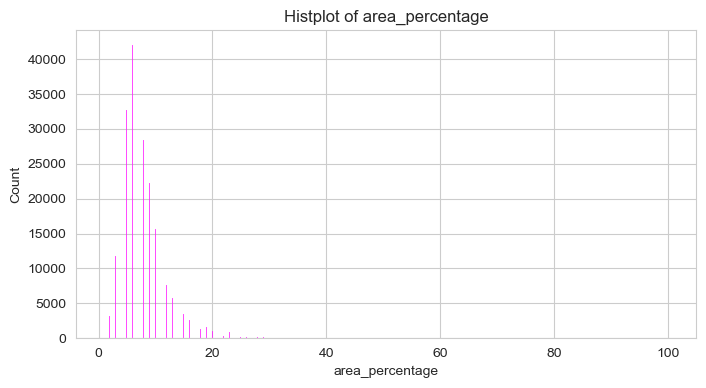

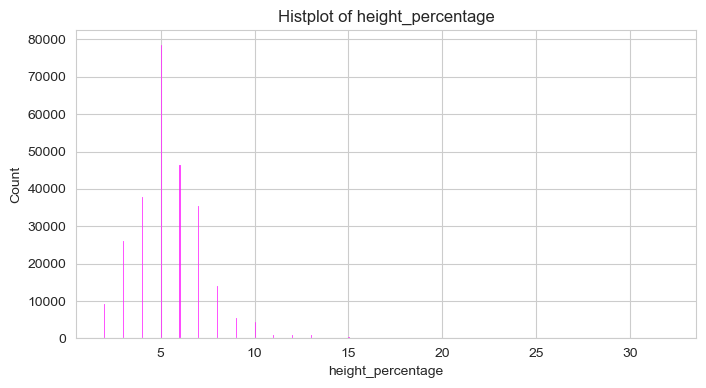

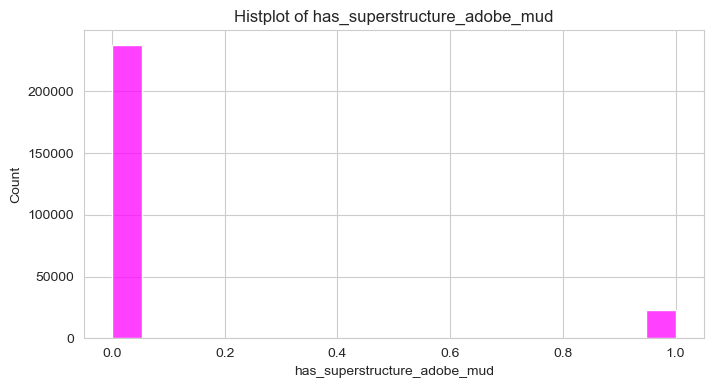

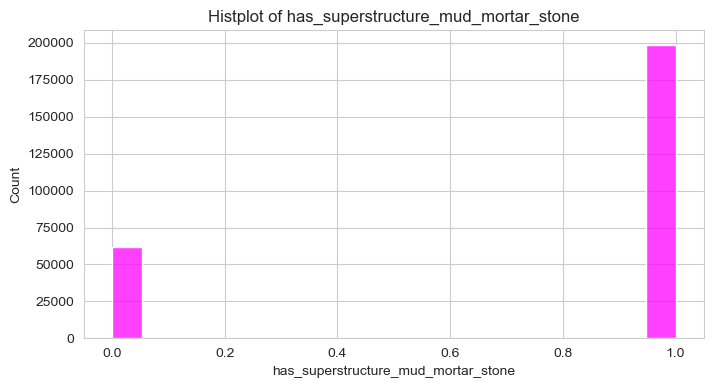

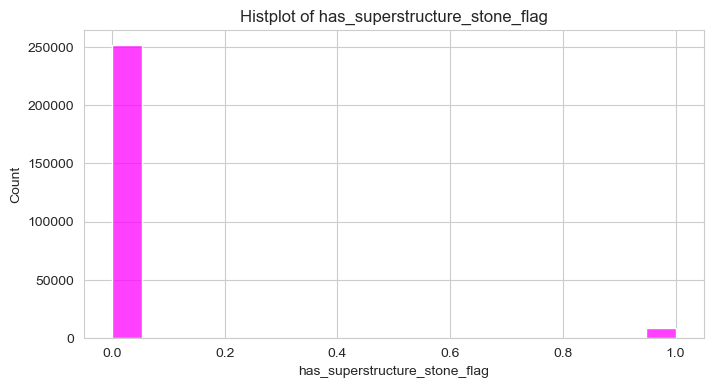

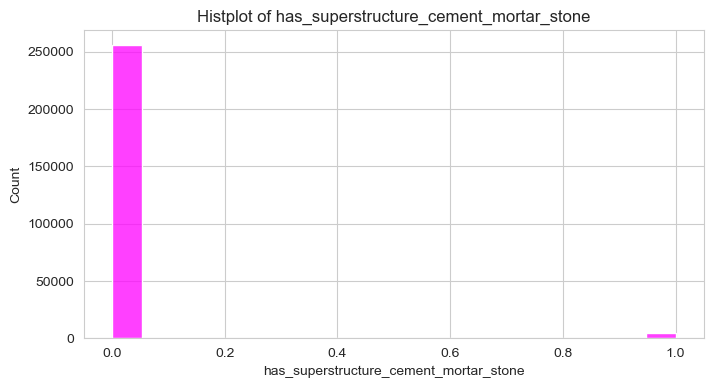

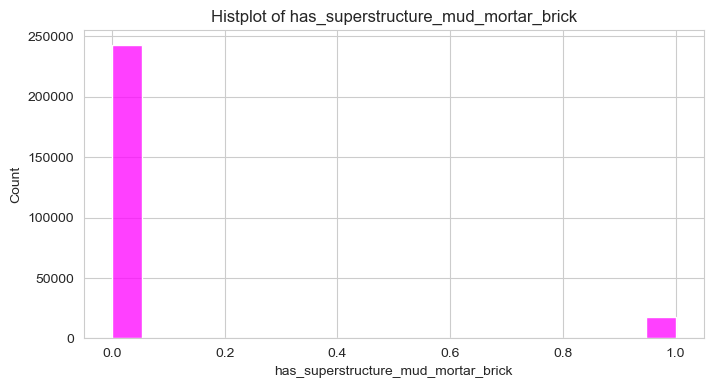

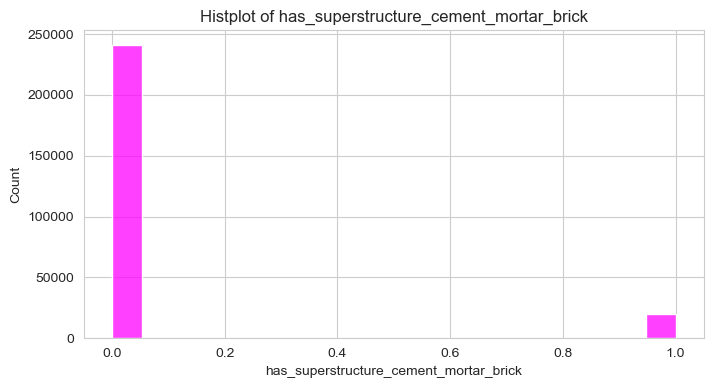

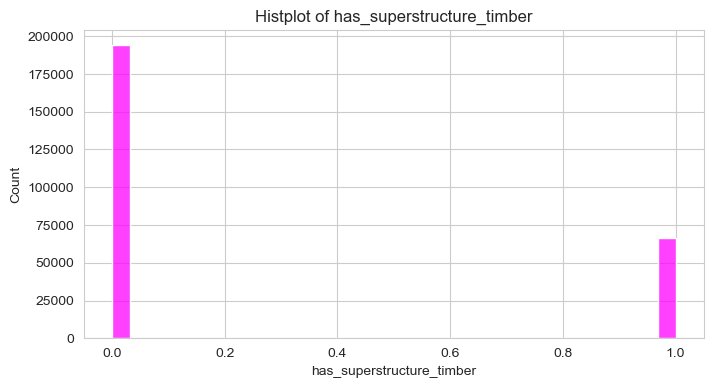

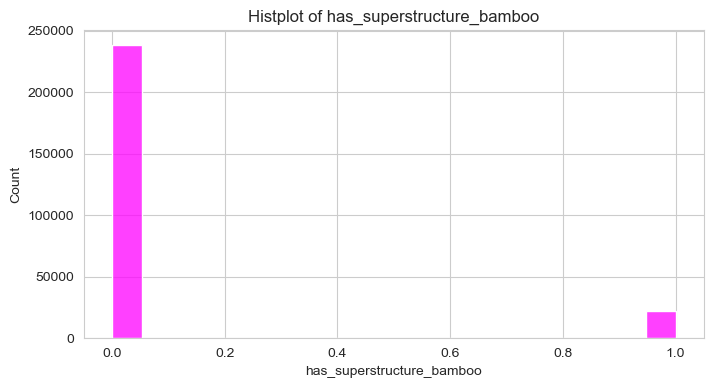

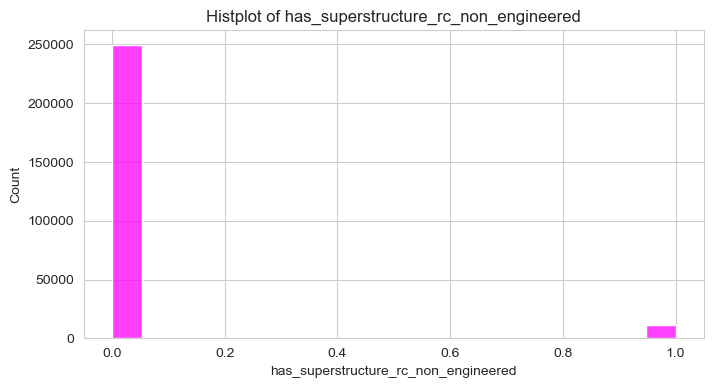

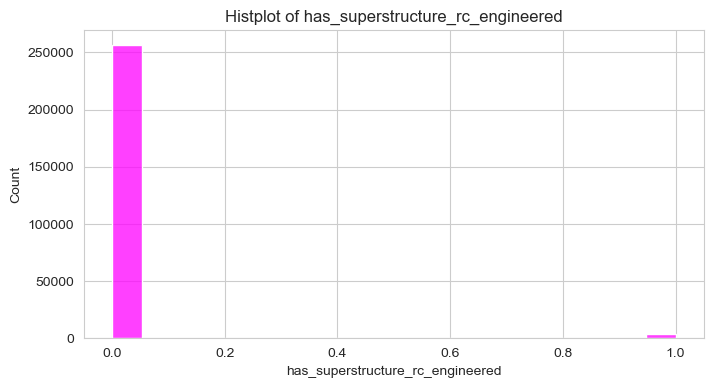

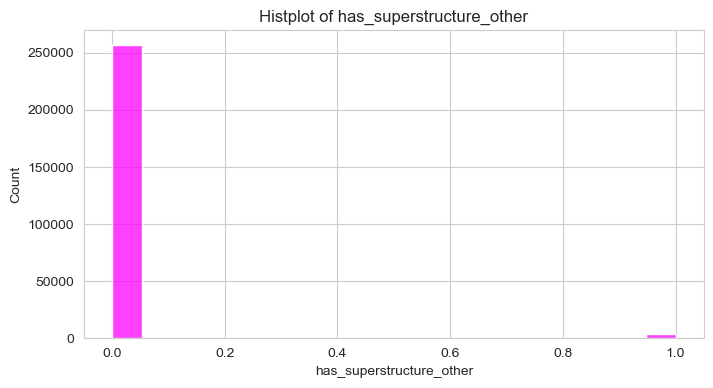

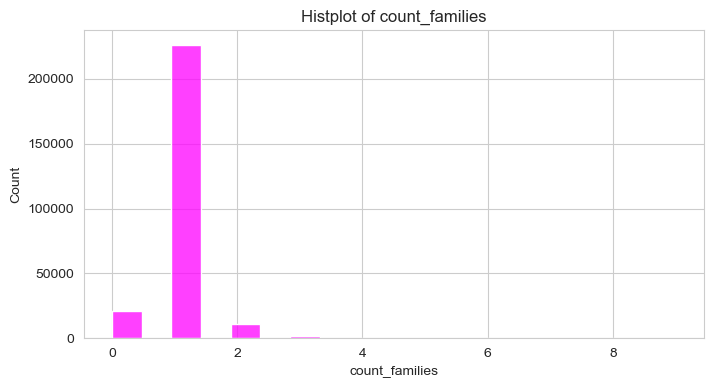

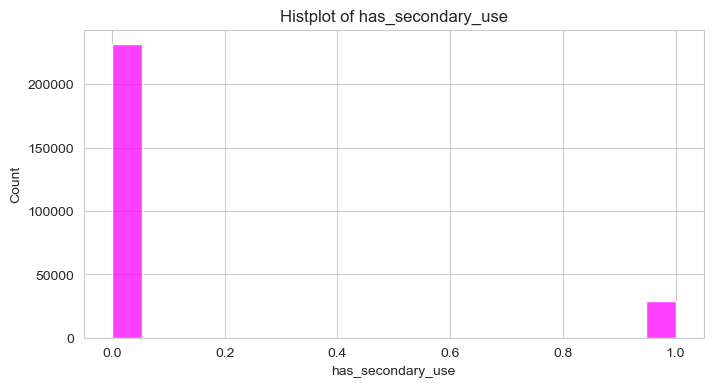

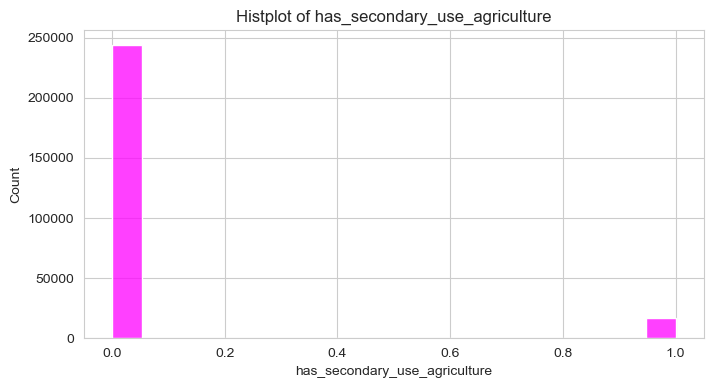

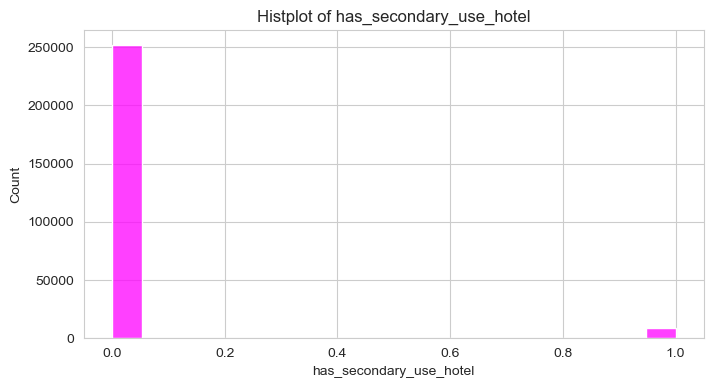

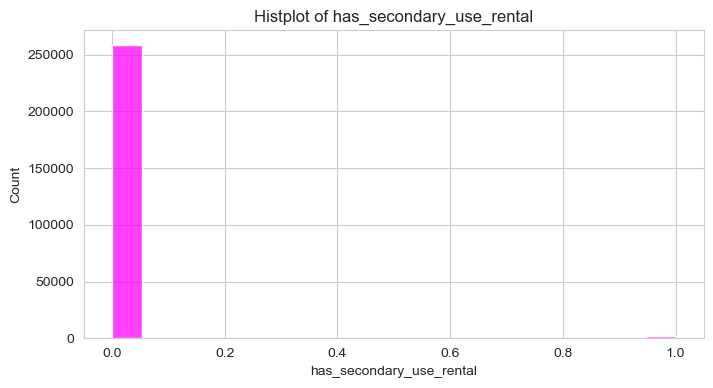

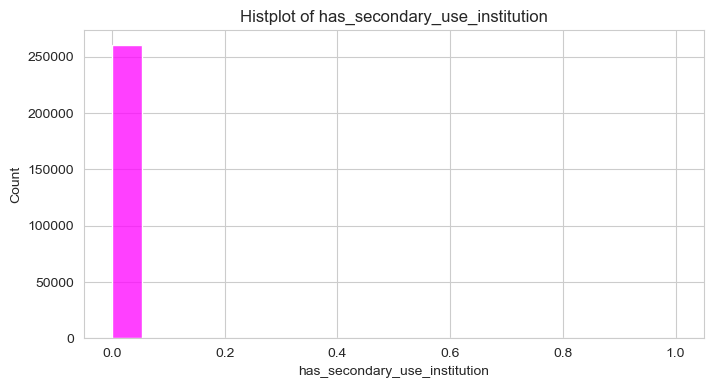

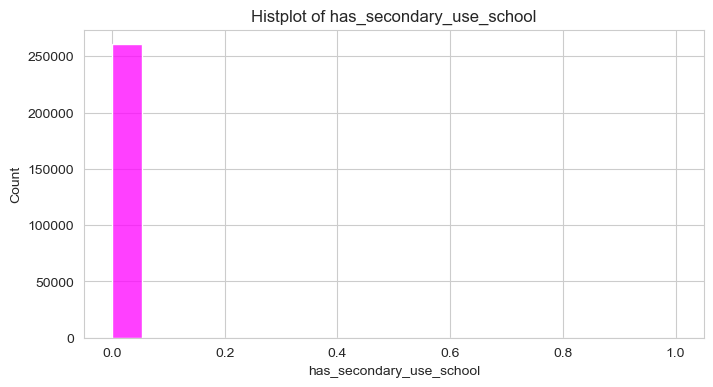

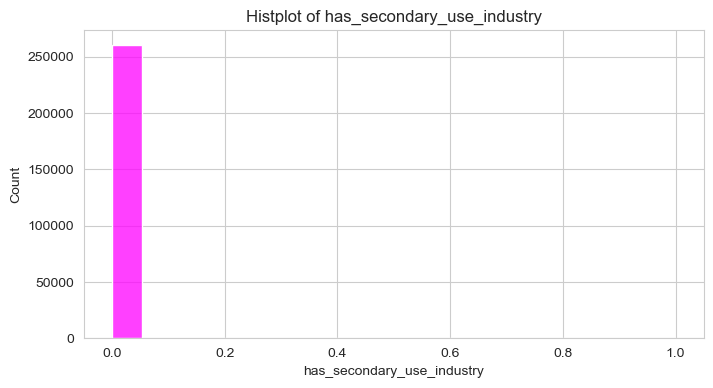

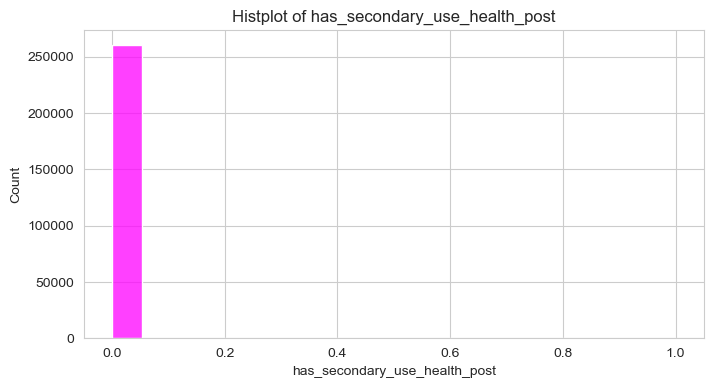

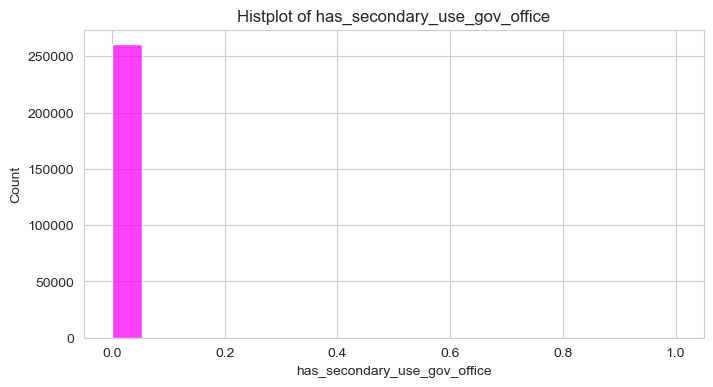

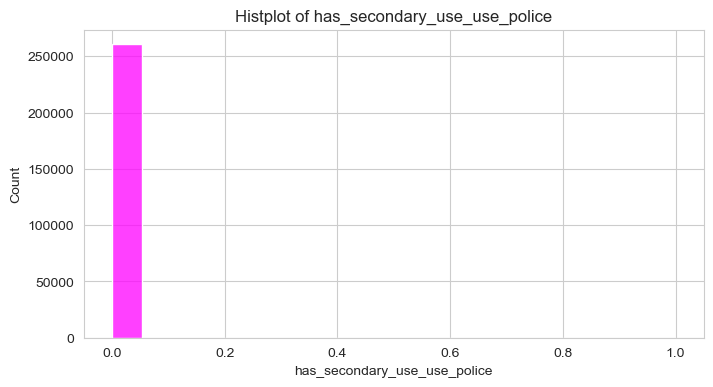

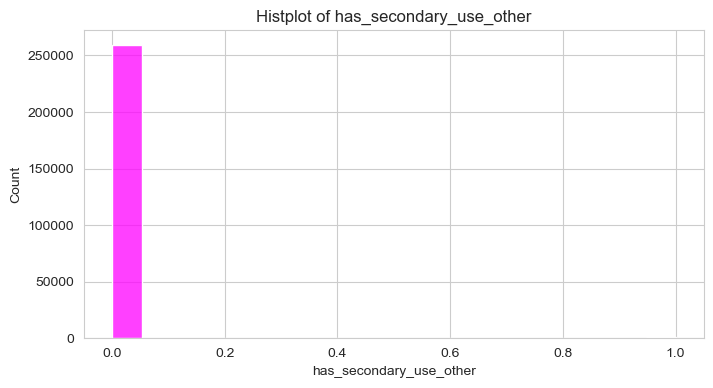

In [167]:
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=eq[col],color="magenta")
    plt.title(f"Histplot of {col}")
    plt.xlabel(col)
    plt.show()

# 9. Data Pre-Processing


#### 9.1 Removing Outliers

In [168]:
# Creating function to remove outliers from dataset

def replace_outliers_with_median(df):
    
    df_cleaned = df.copy()  # Create a copy to avoid modifying the original data

    for col in df_cleaned.select_dtypes(include=[np.number]):  # Apply only to numeric columns
        Q1 = df_cleaned[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df_cleaned[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Replace outliers with the median
        median_value = df_cleaned[col].median()
        df_cleaned[col] = np.where((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound),
                                   median_value, df_cleaned[col])

    return df_cleaned


In [169]:
eq=replace_outliers_with_median(eq)

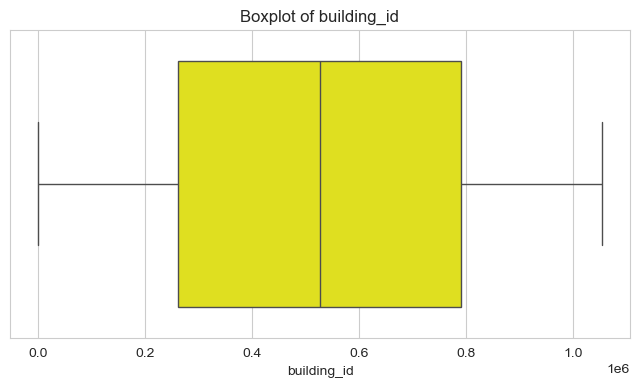

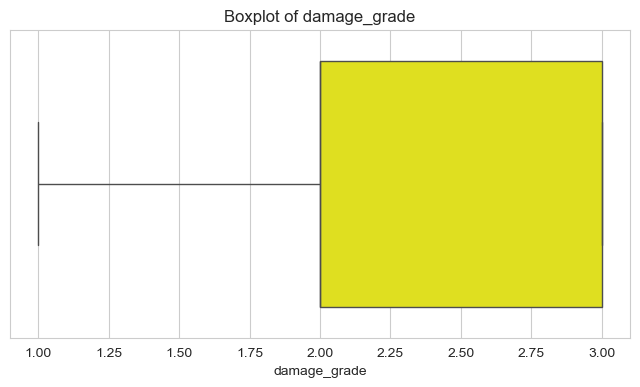

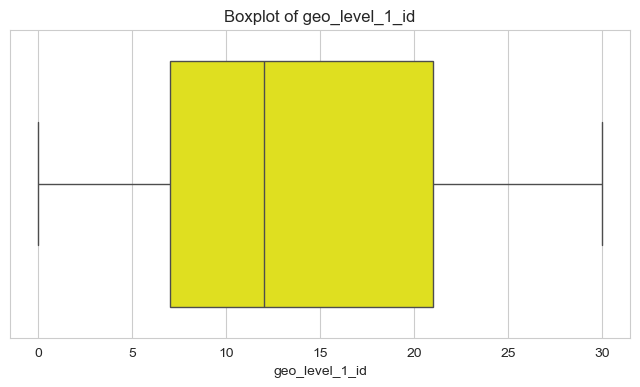

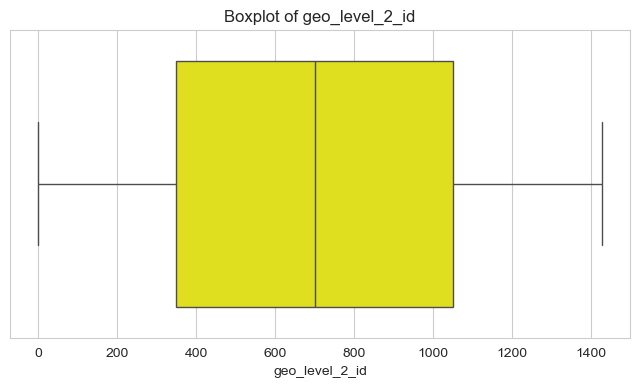

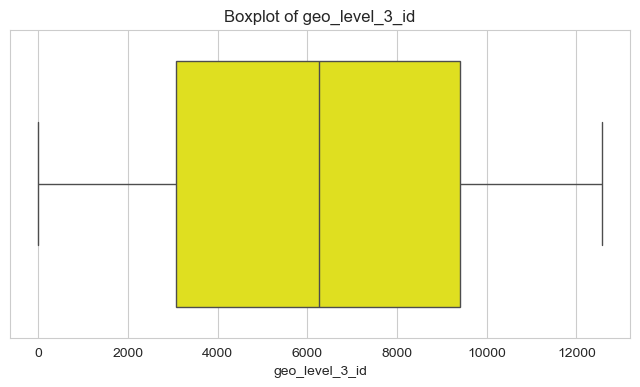

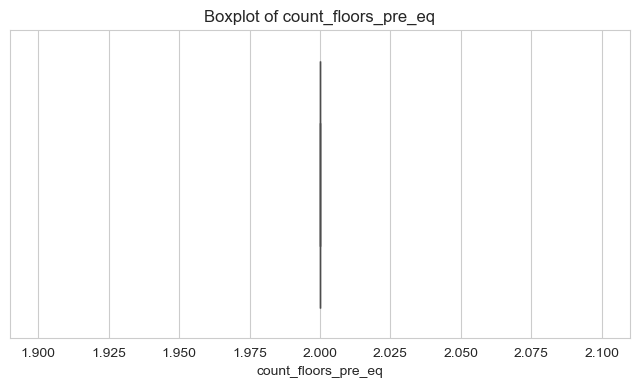

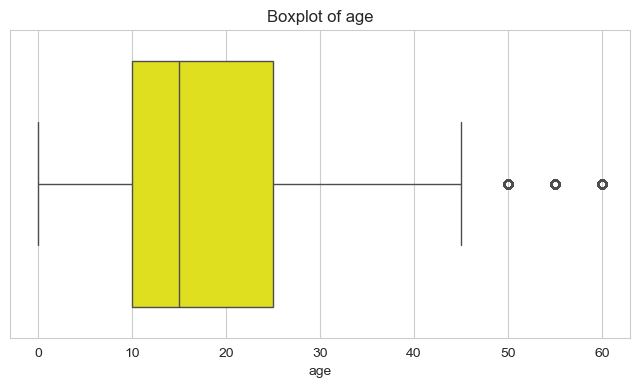

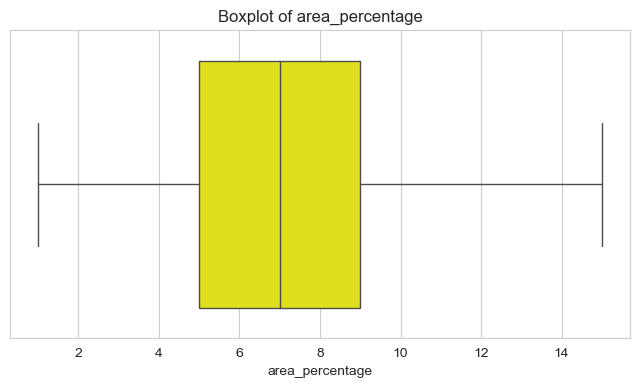

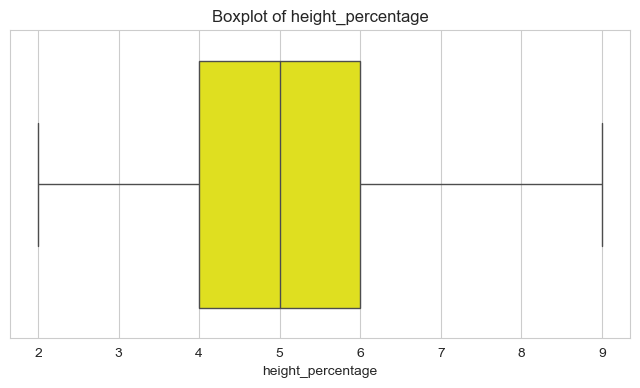

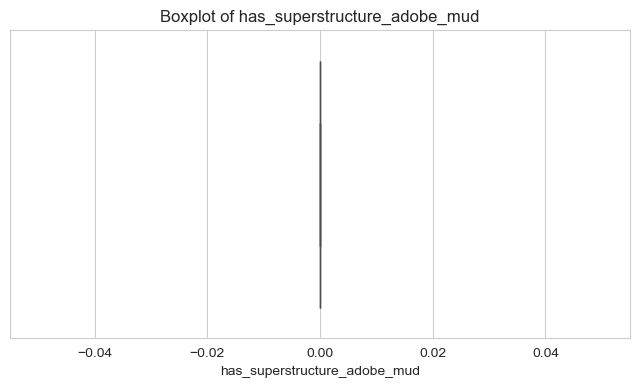

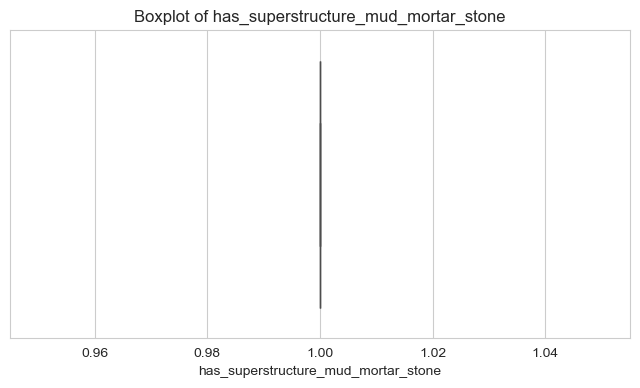

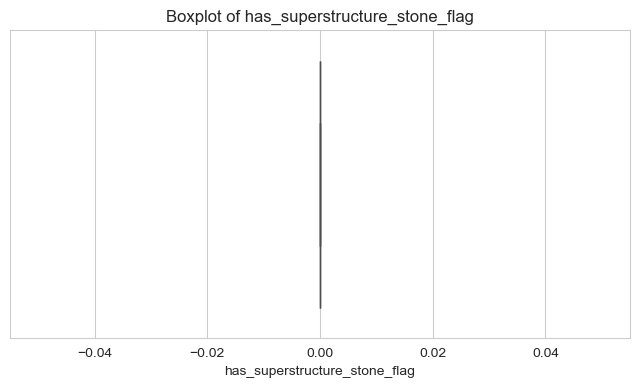

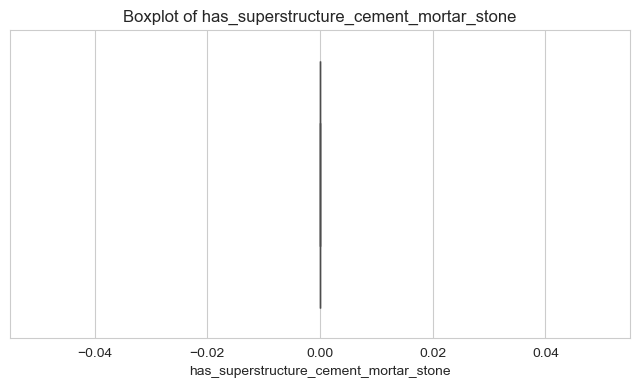

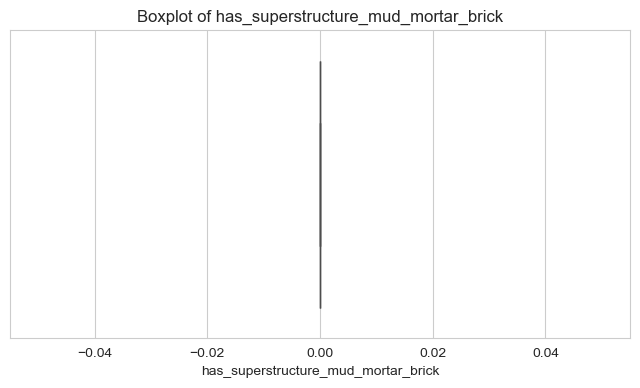

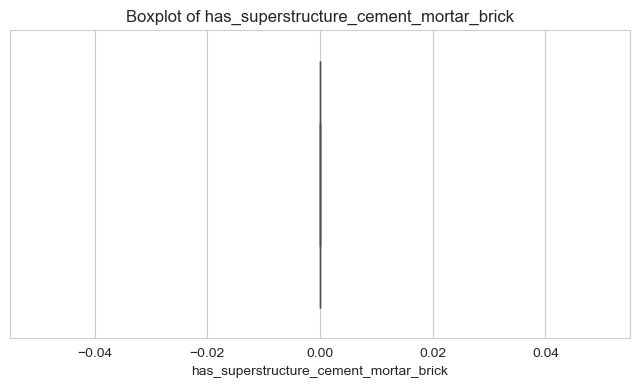

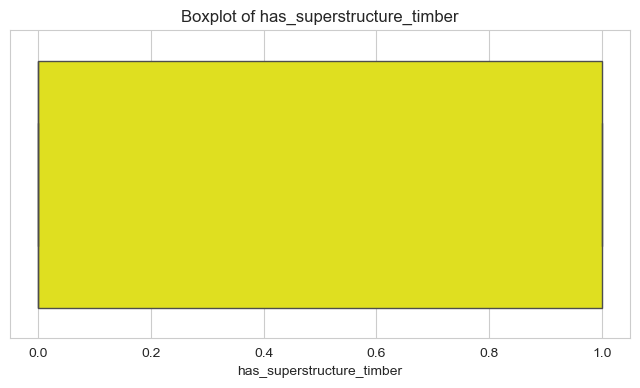

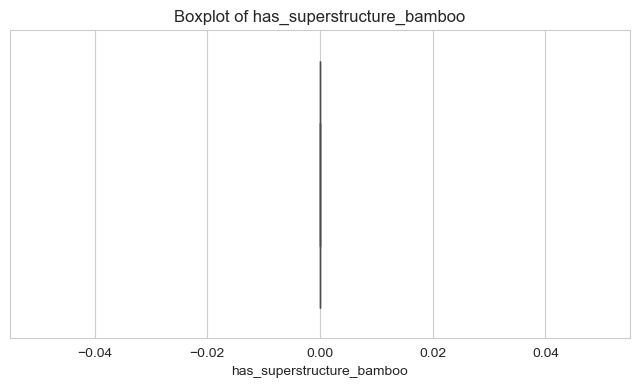

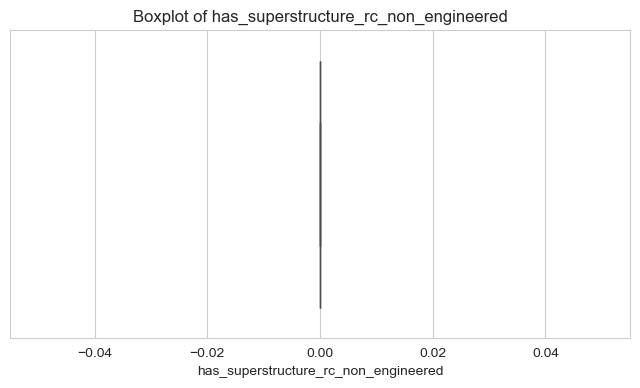

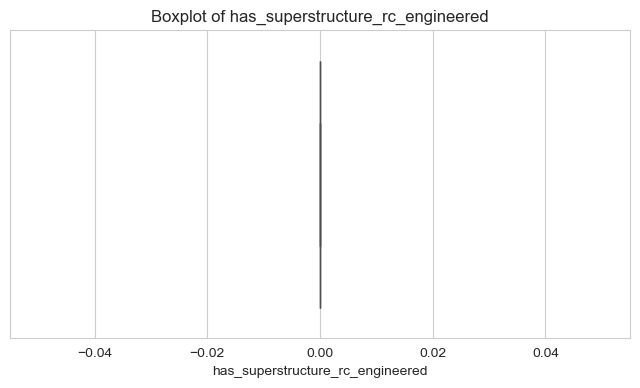

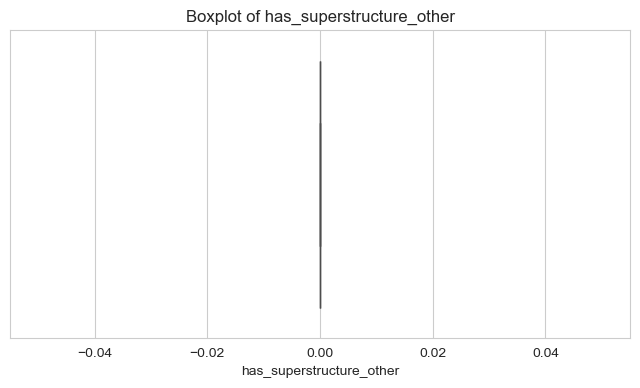

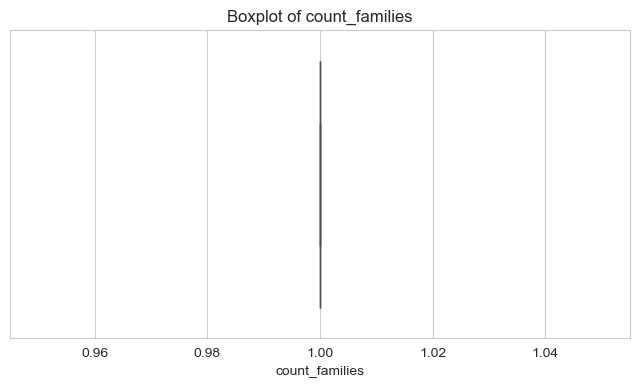

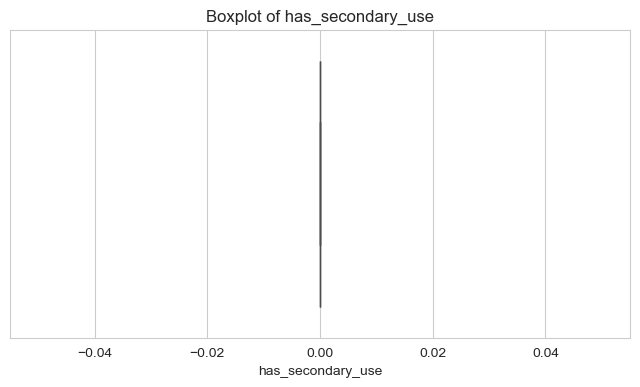

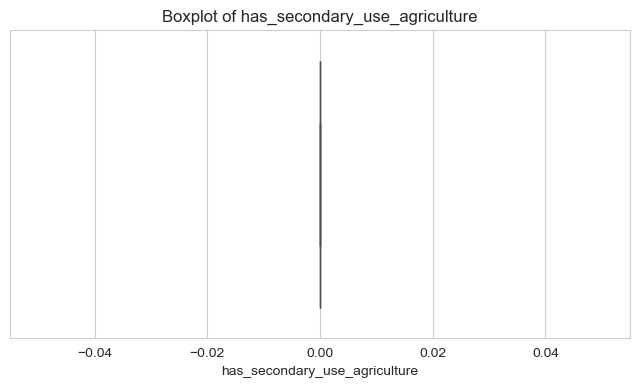

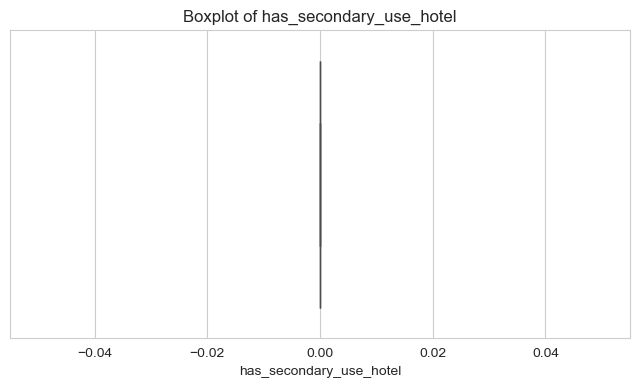

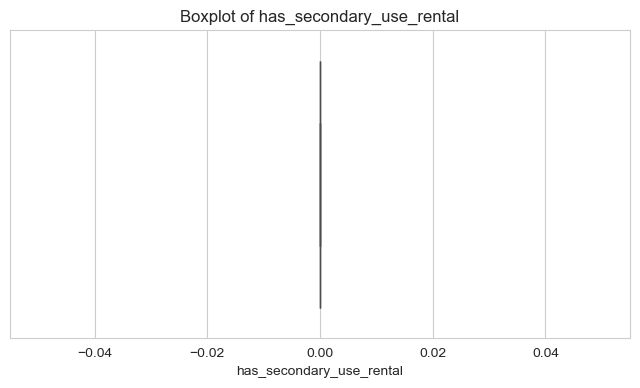

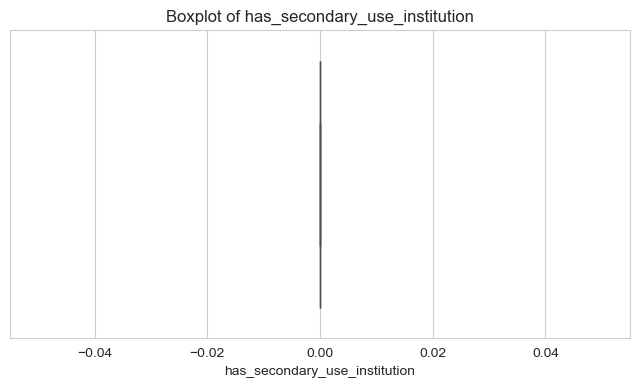

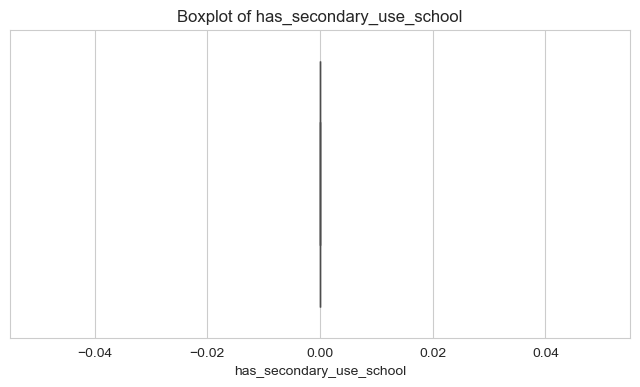

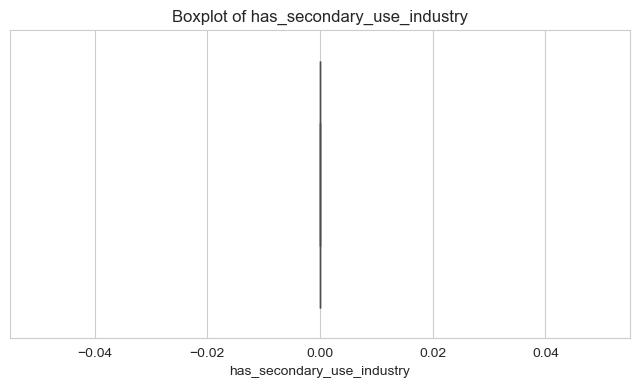

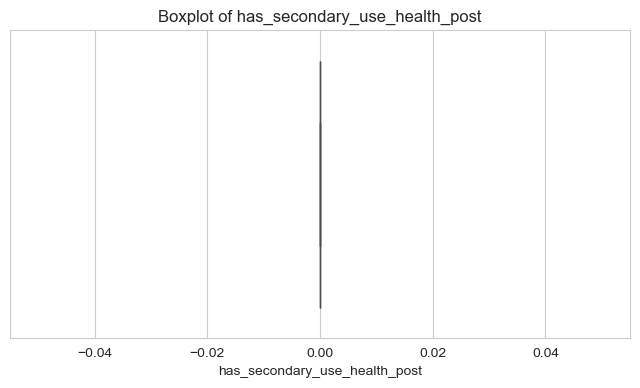

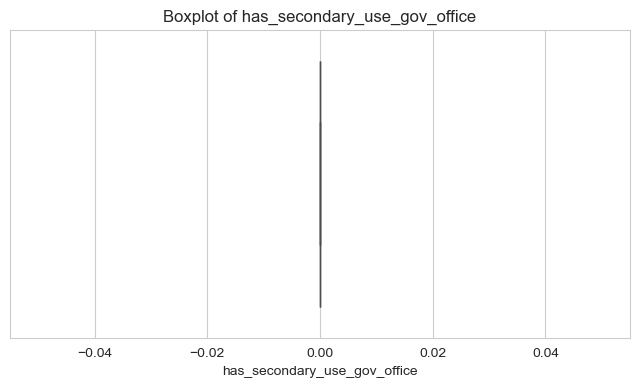

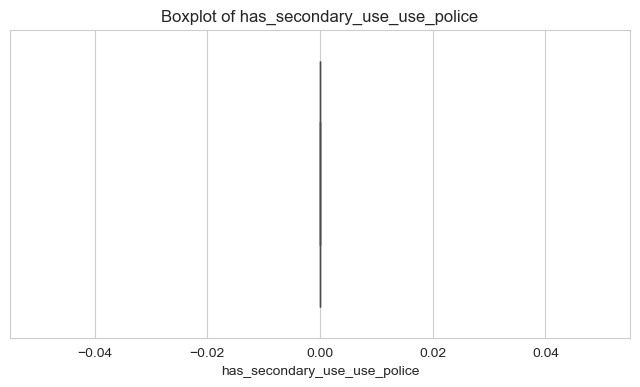

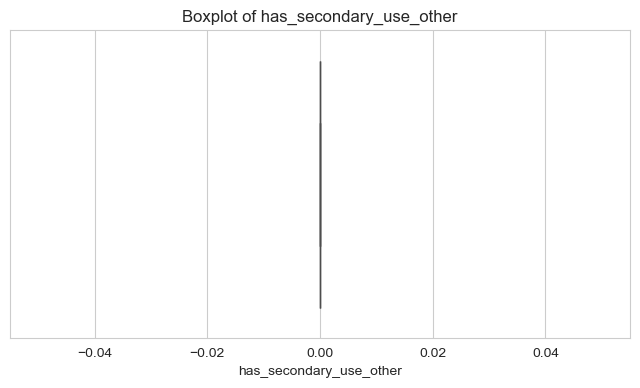

In [170]:
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=eq[col],color="yellow")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

#### 9.2 Dropping Irrelevant Features

In [171]:
eq.drop(columns=["legal_ownership_status","building_id"],inplace=True)

#### 9.3 One Hot Encoding

In [172]:
print(eq.select_dtypes(include="object").columns)

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration'],
      dtype='object')


In [173]:
eq=pd.get_dummies(eq,columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration'])

# 10. Splitting the data into training and testing sets

In [174]:
X=eq.drop(columns=["damage_grade"])

In [175]:
y=eq["damage_grade"]

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [178]:
y_train=y_train-1
y_test=y_test-1

# 11. Prediction Models

#### 11.1 Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
LR=LogisticRegression()

In [181]:
model=LR.fit(X_train,y_train)

In [182]:
y_pred_lr=model.predict(X_test)

In [183]:
f1_micro = f1_score(y_test, y_pred_lr, average='micro')
f1_macro = f1_score(y_test, y_pred_lr, average='macro')
f1_weighted = f1_score(y_test, y_pred_lr, average='weighted')
print("accuracy score:",accuracy_score(y_test,y_pred_lr))
print("F1 Score (Micro):", f1_micro)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (weighted):", f1_weighted)

accuracy score: 0.5665662592812878
F1 Score (Micro): 0.5665662592812878
F1 Score (Macro): 0.2835413542582264
F1 Score (weighted): 0.4210307035512466


#### 11.2 Decision Tree

In [184]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
from sklearn.model_selection import GridSearchCV


In [186]:
dt=DecisionTreeClassifier(
    ccp_alpha=0.0,  
    criterion='gini',  
    max_depth=25,  
    min_samples_leaf=20,  
    min_samples_split=2,  
    random_state=42
)

In [187]:
dt_model=dt.fit(X_train,y_train)

In [188]:
y_pred_dt=dt_model.predict(X_test)

In [189]:
f1_micro = f1_score(y_test, y_pred_dt, average='micro')
f1_macro = f1_score(y_test, y_pred_dt, average='macro')
f1_weighted = f1_score(y_test, y_pred_dt, average='weighted')
print("accuracy score:",accuracy_score(y_test,y_pred_dt))
print("F1 Score (Micro):", f1_micro)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (weighted):", f1_weighted)

accuracy score: 0.7114982444695996
F1 Score (Micro): 0.7114982444695996
F1 Score (Macro): 0.650585299601822
F1 Score (weighted): 0.7060563680423383


#### 11.3 Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rf = RandomForestClassifier( max_depth = None , min_samples_leaf = 2 , min_samples_split = 5 , n_estimators = 100, random_state = 42)

In [192]:
rf_model=rf.fit(X_train,y_train)

In [193]:
y_pred_rf=rf_model.predict(X_test)

In [194]:
f1_micro = f1_score(y_test, y_pred_rf, average='micro')
f1_macro = f1_score(y_test, y_pred_rf, average='macro')
f1_weighted = f1_score(y_test, y_pred_rf, average='weighted')
print("Accuracy Score :",accuracy_score(y_test,y_pred_rf))
print("F1 Score (Micro):", f1_micro)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (weighted):", f1_weighted)

Accuracy Score : 0.7111528942268951
F1 Score (Micro): 0.7111528942268951
F1 Score (Macro): 0.6327318941069667
F1 Score (weighted): 0.6976158401139392


#### 11.4 XG BOOST

In [195]:
from xgboost import XGBClassifier

In [196]:
xgb=XGBClassifier(n_estimators=150,max_depth=8,learning_rate=0.01)

In [197]:
xgb_model = xgb.fit(X_train, y_train)

In [198]:
y_pred_xgb=xgb_model.predict(X_test)

In [199]:
f1_micro = f1_score(y_test, y_pred_xgb, average='micro')
f1_macro = f1_score(y_test, y_pred_xgb, average='macro')
f1_weighted = f1_score(y_test, y_pred_xgb, average='weighted')

print("accuracy score:",accuracy_score(y_test,y_pred_xgb))

print("F1 Score (Micro):", f1_micro)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (weighted):", f1_weighted)

accuracy score: 0.6901057155465168
F1 Score (Micro): 0.6901057155465168
F1 Score (Macro): 0.5907198293359315
F1 Score (weighted): 0.6712623981558583


#### 11.5 LIGHT GBM

In [200]:
import lightgbm as lgb

In [201]:
lgbm_model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.05, 
                                n_estimators=100, objective='multiclass', random_state=42)

lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 208480, number of used features: 41
[LightGBM] [Info] Start training from score -2.346413
[LightGBM] [Info] Start training from score -0.562637
[LightGBM] [Info] Start training from score -1.094868


LGBMClassifier(learning_rate=0.05, objective='multiclass', random_state=42)

In [202]:
y_pred_gbm = lgbm_model.predict(X_test)

In [205]:
f1_micro = f1_score(y_test, y_pred_gbm, average='micro')
f1_macro = f1_score(y_test, y_pred_gbm, average='macro')
f1_weighted = f1_score(y_test, y_pred_gbm, average='weighted')


In [214]:
print("Accuracy Score :",accuracy_score(y_test, y_pred_gbm))
print("F1 Score (Micro):", f1_micro)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (weighted):", f1_weighted)

Accuracy Score : 0.6983557491222347
F1 Score (Micro): 0.6983557491222347
F1 Score (Macro): 0.6151776805064062
F1 Score (weighted): 0.6842842245245706


#### 11.6 ANN

In [215]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)  
y_test = to_categorical(y_test, num_classes=3)


In [216]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [217]:
ann_model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3,activation='softmax')
])

In [218]:
ann_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=["accuracy",Precision(),Recall()])

In [219]:


X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)  


In [220]:
ann=ann_model.fit(X_train,y_train,epochs=20,verbose=2,validation_split=0.2)

Epoch 1/20
5212/5212 - 22s - loss: 1.9147 - accuracy: 0.5681 - precision_3: 0.5687 - recall_3: 0.5617 - val_loss: 0.9120 - val_accuracy: 0.5693 - val_precision_3: 0.5693 - val_recall_3: 0.5693 - 22s/epoch - 4ms/step
Epoch 2/20
5212/5212 - 21s - loss: 0.9123 - accuracy: 0.5698 - precision_3: 0.5698 - recall_3: 0.5698 - val_loss: 0.9122 - val_accuracy: 0.5693 - val_precision_3: 0.5693 - val_recall_3: 0.5693 - 21s/epoch - 4ms/step
Epoch 3/20
5212/5212 - 20s - loss: 0.9215 - accuracy: 0.5698 - precision_3: 0.5698 - recall_3: 0.5698 - val_loss: 0.9112 - val_accuracy: 0.5693 - val_precision_3: 0.5693 - val_recall_3: 0.5693 - 20s/epoch - 4ms/step
Epoch 4/20
5212/5212 - 20s - loss: 0.9121 - accuracy: 0.5698 - precision_3: 0.5698 - recall_3: 0.5698 - val_loss: 0.9119 - val_accuracy: 0.5693 - val_precision_3: 0.5693 - val_recall_3: 0.5693 - 20s/epoch - 4ms/step
Epoch 5/20
5212/5212 - 20s - loss: 0.9167 - accuracy: 0.5698 - precision_3: 0.5698 - recall_3: 0.5698 - val_loss: 0.9119 - val_accuracy:

# 12. Model Comparison Report


This report provides a comparative analysis of five machine learning models based on their classification performance metrics, including Accuracy Score, F1 Score (Micro), F1 Score (Macro), and F1 Score (Weighted). The models evaluated are:

1. Logistic Regression

* Lowest accuracy (0.5666) and lowest F1 scores among all models.

* Particularly weak in terms of F1 Macro (0.2835), indicating poor performance across different classes.

* Not an optimal choice for this dataset.


2. Decision Tree (DT)

* Achieved the highest accuracy (0.7115) and strong F1 scores across all metrics.


* Good overall performance, with an F1 Macro of 0.6506, showing balanced class-wise prediction capability.




3. Random Forest (RF)

* Similar accuracy to Decision Tree (0.7112) but slightly lower F1 Macro (0.6327) and F1 Weighted (0.6976).


* Provides robustness against overfitting compared to a single decision tree.

4. XGBoost (XGB)

* Accuracy of 0.6901, slightly lower than Decision Tree and Random Forest.


* F1 Macro (0.5907) is lower than Decision Tree and Random Forest but better than Logistic Regression.


* Performs well in handling complex relationships in data.

5. LightGBM

* Accuracy of 0.6984, slightly better than XGBoost but lower than Decision Tree and Random Forest.


* F1 Macro (0.6152) is an improvement over XGBoost, showing good class balance.


* Efficient and fast model with good overall performance.







# 13. Challenges Faced


1. Class Imbalance:

   One of the major challenges in this project was dealing with class imbalance. Since earthquake damage varies significantly, some damage levels were underrepresented in the dataset. This imbalance can lead to biased models that favor the majority class, reducing prediction accuracy for the minority classes.

2. Multi-Class Classification Complexity;

   Unlike binary classification, this project involved predicting multiple levels of damage, making model selection and optimization more challenging. Ensuring the model effectively distinguishes between different damage categories required fine-tuning and advanced techniques.

3. Feature Engineering and Selection:

   With 38 features, selecting the most relevant ones without overfitting was crucial. Many features were categorical, requiring proper encoding techniques. Some features might also have had correlations that needed careful analysis.

4. Data Preprocessing and Encoding:

   Handling categorical variables (which were obfuscated) and converting them into numerical formats while preserving useful information was a challenge. Choosing the right encoding methods (one-hot encoding, label encoding, etc.) significantly impacted model performance.

5. Computational Cost:

    Processing a large dataset with multiple features and running complex models like ensemble methods or deep learning required significant computational resources. Training time and memory usage had to be optimized for efficiency.

6. Model Evaluation and Metric Selection:

    Given the class imbalance, traditional accuracy metrics were not sufficient. Using metrics like F1-score, precision-recall, and confusion matrices was necessary to evaluate performance correctly across all damage categories.

7. Overfitting and Generalization:

    With a large number of features and a relatively imbalanced dataset, preventing overfitting was a challenge. Proper cross-validation, regularization techniques, and hyperparameter tuning were necessary to ensure the model generalized well on unseen data.

8. Domain Knowledge for Interpretation:

    Understanding earthquake-related building vulnerabilities required some domain knowledge. Interpreting model results and ensuring meaningful insights rather than just mathematical optimizations was an important aspect of the project.



# 14. Conclusion

* Best Model: Decision Tree performs the best in terms of accuracy and balanced F1 scores.


* Alternative Choice: Random Forest provides similar performance to Decision Tree with better generalization.


* Gradient Boosting Models (XGBoost & LightGBM): Perform well but are slightly behind in accuracy and F1 scores.


* Logistic Regression: Not recommended due to significantly lower performance.


For the best balance of accuracy and class-wise performance, Decision Tree or Random Forest would be the preferred choices. If computational efficiency is a concern, LightGBM could be a viable alternative.